In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###########################################################################################################
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv
people = ['dogs','cats']
dir_train = '/content/drive/MyDrive/CatDog/train' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in people:
    path = os.path.join(dir,i)
    index_label = people.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(200,200)) # độ phân giải tùy ae chọn nhé!
      img = img_to_array(img)
      img = img.reshape(200,200,3) #hàm reshape phải có cùng độ phân giải với target_size của nhé
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 
# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape) # nhớ chú ý kích thước hình ảnh để tí cho vào input của model
print(y_train.shape)


(2000, 200, 200, 3)
(2000, 2)


In [ ]:
model=Sequential()
# Block 1/3
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3))) # 32 lần sử dụng bộ lọc, bộ lọc có kích thước là 3x3  
# khai báo bộ lọc kernel và padding là same nghĩa là ảnh trước khi lọc và sau khi lọc phải cùng kích thước
model.add(MaxPooling2D((2, 2)))
##################################################
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Dense là full-connected, nối đầy đủ tế bào lại vs nhau
model.add(Dense(2, activation='sigmoid'))


In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 20)


Epoch 1/20
63/63 [==============================] - 2s 33ms/step - loss: 0.3688 - accuracy: 0.8355
Epoch 2/20
63/63 [==============================] - 2s 36ms/step - loss: 0.3200 - accuracy: 0.8615
Epoch 3/20
63/63 [==============================] - 2s 32ms/step - loss: 0.2454 - accuracy: 0.9045
Epoch 4/20
63/63 [==============================] - 2s 32ms/step - loss: 0.1226 - accuracy: 0.9655
Epoch 5/20
63/63 [==============================] - 2s 33ms/step - loss: 0.1756 - accuracy: 0.9370
Epoch 6/20
63/63 [==============================] - 2s 33ms/step - loss: 0.0743 - accuracy: 0.9820
Epoch 7/20
63/63 [==============================] - 2s 38ms/step - loss: 0.0689 - accuracy: 0.9805
Epoch 8/20
63/63 [==============================] - 2s 33ms/step - loss: 0.0540 - accuracy: 0.9845
Epoch 9/20
63/63 [==============================] - 2s 32ms/step - loss: 0.0171 - accuracy: 0.9970
Epoch 10/20
63/63 [==============================] - 2s 33ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 11/

In [ ]:
model.save('/content/drive/MyDrive/CatDog/CatDog.h5')

array([0])

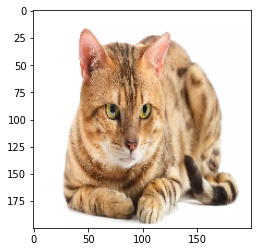

In [ ]:
pic = image.load_img('cat.jpg', target_size=(200,200)) # độ phân giải tùy ae chọn nhé!
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,200,200,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)